In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
G = nx.read_edgelist('booktok_edgelist.txt', delimiter='\t', create_using=nx.DiGraph())

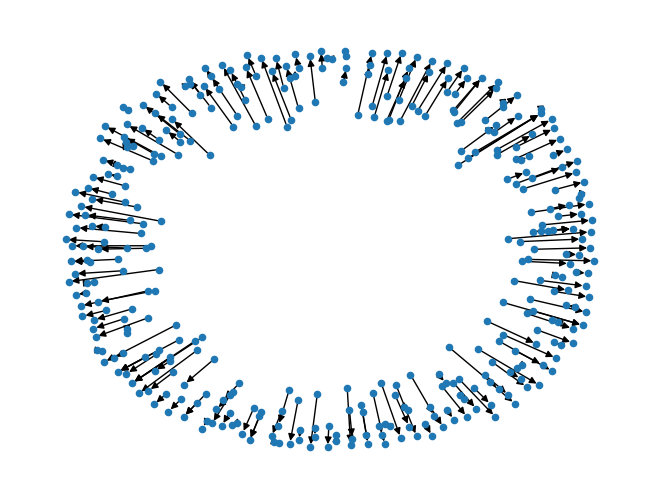

In [3]:
nx.draw_spring(G, node_size=20)

<BarContainer object of 5 artists>

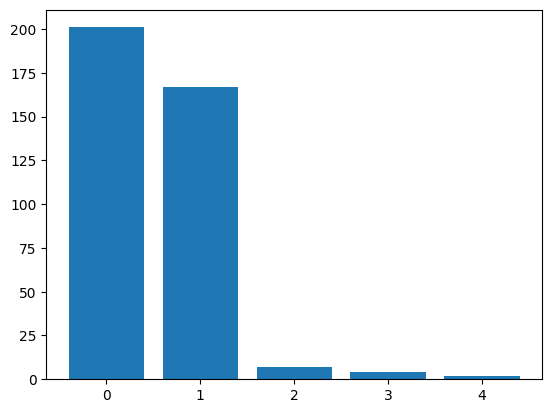

In [4]:
fig, ax = plt.subplots()
degree_sequence = degree_sequence = sorted((d for n, d in G.in_degree()), reverse=True)
ax.bar(*np.unique(degree_sequence, return_counts=True))

In [5]:
np.unique(degree_sequence, return_counts=True)

(array([0, 1, 2, 3, 4]), array([201, 167,   7,   4,   2], dtype=int64))

In [6]:
largest_cc = max(nx.connected_components(nx.to_undirected(G)), key=len)

In [7]:
largest_cc

{'https://www.tiktok.com/@amyirby5/video/7375134798370704682',
 'https://www.tiktok.com/@leahs.library8/video/7375300736453758241',
 'https://www.tiktok.com/@rebeccarosereads/video/7375251771385580833',
 'https://www.tiktok.com/@sofiesbooked/video/7374854606385433898',
 'https://www.tiktok.com/@thatguyjae/video/7367479745308527915\r'}

How many videos stitch outside their hashtag?

In [8]:
hashtag = 'watermelon'

# Load original video information
data_path = f"../data/hashtags/vertices/{hashtag}.json"
with open(data_path, 'r') as f:
    original_videos = json.load(f)

hashtag_not_used = 0
hashtags_used = 0

# Calculate the percentage of videos that stitch outside the hashtag
for original_id, original_data in original_videos.items():
    if original_data['is_stitchee']:
        if hashtag not in original_data['hashtag_names']:
            hashtag_not_used += 1
        else:
            hashtags_used += 1

In [9]:
print(f"Hashtag: {hashtag}")
print(f"Hashtag used: {hashtags_used}")
print(f"Hashtag not used: {hashtag_not_used}")
print(f"{hashtags_used / (hashtag_not_used + hashtags_used) * 100:.2f}% of stitched videos used the hashtag of the stitch video")

Hashtag: watermelon
Hashtag used: 7
Hashtag not used: 129
5.15% of stitched videos used the hashtag of the stitch video


In [10]:
#The above, but for all hashtags
hashtags = os.listdir('../data/hashtags/vertices')

#remove .json from hashtags
hashtags = [hashtag[:-5] for hashtag in hashtags]

for hashtag in hashtags:
    # Load original video information
    data_path = f"../data/hashtags/vertices/{hashtag}.json"
    if os.path.isfile(data_path):  # Check if the path is a file
        with open(data_path, 'r') as f:
            original_videos = json.load(f)

        hashtag_not_used = 0
        hashtags_used = 0

        # Calculate the percentage of videos that stitch outside the hashtag
        for original_id, original_data in original_videos.items():
            if original_data['is_stitchee']:
                if hashtag not in original_data['hashtag_names']:
                    hashtag_not_used += 1
                else:
                    hashtags_used += 1

        print(f"Hashtag: {hashtag}")
        print(f"Hashtag used: {hashtags_used}")
        print(f"Hashtag not used: {hashtag_not_used}")
        print(f"{hashtags_used / (hashtag_not_used + hashtags_used) * 100:.2f}% of stitched videos used the hashtag of the stitch video")
        print()

Hashtag: abortion
Hashtag used: 6
Hashtag not used: 30
16.67% of stitched videos used the hashtag of the stitch video

Hashtag: anime
Hashtag used: 367
Hashtag not used: 492
42.72% of stitched videos used the hashtag of the stitch video

Hashtag: asmr
Hashtag used: 22
Hashtag not used: 65
25.29% of stitched videos used the hashtag of the stitch video

Hashtag: biden2024
Hashtag used: 6
Hashtag not used: 102
5.56% of stitched videos used the hashtag of the stitch video

Hashtag: blacklivesmatter
Hashtag used: 3
Hashtag not used: 198
1.49% of stitched videos used the hashtag of the stitch video

Hashtag: booktok
Hashtag used: 869
Hashtag not used: 942
47.98% of stitched videos used the hashtag of the stitch video

Hashtag: catsoftiktok
Hashtag used: 110
Hashtag not used: 283
27.99% of stitched videos used the hashtag of the stitch video

Hashtag: challenge
Hashtag used: 19
Hashtag not used: 260
6.81% of stitched videos used the hashtag of the stitch video

Hashtag: climatechange
Hashtag 

In [11]:
#the above but for all hashtags together

all_within_hashtag_count = []
all_outside_hashtag_count = []
all_no_hashtag_count = []

for hashtag in hashtags:
    # Load original video information
    data_path = f"../data/hashtags/vertices/{hashtag}.json"
    if os.path.isfile(data_path):  # Check if the path is a file
        with open(data_path, 'r') as f:
            original_videos = json.load(f)

        hashtag_not_used = 0
        hashtags_used = 0
        no_hashtag = 0

        # Calculate the percentage of videos that stitch outside the hashtag
        for original_id, original_data in original_videos.items():
            if original_data['is_stitchee']:
                if hashtag not in original_data['hashtag_names']:
                    hashtag_not_used += 1
                    if original_data['hashtag_names'] == []:
                        no_hashtag += 1
                else:
                    hashtags_used += 1

        all_within_hashtag_count.append(hashtags_used)
        all_outside_hashtag_count.append(hashtag_not_used)
        all_no_hashtag_count.append(no_hashtag)

print(f"Hashtags used: {np.sum(all_within_hashtag_count)}")
print(f"Hashtags not used: {np.sum(all_outside_hashtag_count)}")
print(f"No hashtags: {np.sum(all_no_hashtag_count)}")
print(f"{np.sum(all_within_hashtag_count) / (np.sum(all_outside_hashtag_count) + np.sum(all_within_hashtag_count)) * 100:.2f}% of stitched videos used the hashtag of the stitch video")

Hashtags used: 2641
Hashtags not used: 11640
No hashtags: 3025
18.49% of stitched videos used the hashtag of the stitch video


Ratio between stitcher view count and stitchee view count

In [12]:
hashtag = 'election'

# Load original video information
data_path = f"../data/hashtags/vertices/{hashtag}.json"
with open(data_path, 'r') as f:
    original_videos = json.load(f)

stitcher_view_count = []
stitchee_view_count = []

# Get the view count of the stitcher and stitchee
for original_id, original_data in original_videos.items():
    if original_data['is_stitcher']:
        stitcher_view_count.append(original_data['view_count'])
        #get the stitchee view count
        stitchee_id = original_data['stitches']
        stitchee_view_count.append(original_videos[str(stitchee_id)]['view_count'] if str(stitchee_id) in original_videos else None)


In [13]:
print(f"Hashtag: {hashtag}")
print(stitcher_view_count)
print(stitchee_view_count)

Hashtag: election
[538, 337, 4456, 56, 156, 29, 258, 969, 115, 409, 333, 427, 204, 224, 156, 514, 140, 1922, 157, 1120, 281, 325, 329, 1284, 1266, 223, 294, 2344, 81709, 131, 3218, 351, 149, 525, 414, 325, 198, 444, 391, 559, 635, 561, 310, 218, 227, 284, 374, 598, 354, 2100, 242, 2084, 366, 8585, 1639, 1123, 427, 396, 1691, 9559, 640, 1459, 85, 510, 790, 471, 367, 31, 25852, 687, 397, 900, 706, 24, 507, 1651, 529, 126, 76, 246, 380, 14325, 25051, 4025, 252, 244, 1979, 3107, 2041, 352, 374, 160, 218, 193, 336, 2901, 299, 199, 330, 283, 245, 302, 321, 384, 315, 293, 368, 583, 294, 3441, 264, 587, 276, 5911, 503, 2008, 374, 271, 483, 412, 221, 273, 930, 435, 1464, 341, 1343, 306, 286, 292, 3788, 585, 789, 42319, 797, 335, 303, 245, 185, 443, 315, 488, 10369, 6611, 4324, 411, 475, 468, 231, 953, 191, 2917, 462, 268, 199, 78356, 279, 421, 241, 297, 479, 72, 72, 582, 3651, 289, 384, 314, 415, 11, 398, 337, 3429, 328, 409, 399, 319, 315, 501, 321, 271, 520, 1842, 33, 1050, 628, 255, 624, 299

In [14]:
#calculate how much bigger the stitchee view count is compared to the stitcher view count
view_count_ratio = [stitchee / stitcher if stitchee is not None else None for stitcher, stitchee in zip(stitcher_view_count, stitchee_view_count)]

In [15]:
#average of all view count ratios
average_view_count_ratio = np.mean([ratio for ratio in view_count_ratio if ratio is not None])

In [16]:
average_view_count_ratio

10248.932361290219

In [17]:
#median of all view count ratios
median_view_count_ratio = np.median([ratio for ratio in view_count_ratio if ratio is not None])

In [18]:
median_view_count_ratio

936.8239436619718

In [19]:
#mean of all stitcher view counts
average_stitcher_view_count = np.mean([view_count for view_count in stitcher_view_count if view_count is not None])

In [20]:
average_stitcher_view_count

5998.825112107624

In [21]:
#mean of all stitchee view counts
average_stitchee_view_count = np.mean([view_count for view_count in stitchee_view_count if view_count is not None])

In [22]:
average_stitchee_view_count

1887430.822485207

In [23]:
#the above but for all hashtags
for hashtag in hashtags:
    # Load original video information
    data_path = f"../data/hashtags/vertices/{hashtag}.json"
    if os.path.isfile(data_path):  # Check if the path is a file
        with open(data_path, 'r') as f:
            original_videos = json.load(f)

        stitcher_view_count = []
        stitchee_view_count = []

        # Get the view count of the stitcher and stitchee
        for original_id, original_data in original_videos.items():
            if original_data['is_stitcher']:
                stitcher_view_count.append(original_data['view_count'])
                #get the stitchee view count
                stitchee_id = original_data['stitches']
                stitchee_view_count.append(original_videos[str(stitchee_id)]['view_count'] if str(stitchee_id) in original_videos else None)

        print(f"Hashtag: {hashtag}")
        #print(stitcher_view_count)
        #print(stitchee_view_count)

        #calculate how much bigger the stitchee view count is compared to the stitcher view count
        view_count_ratio = [stitchee / stitcher if stitchee is not None and stitcher != 0 else None for stitcher, stitchee in zip(stitcher_view_count, stitchee_view_count)]

        #average of all view count ratios
        average_view_count_ratio = np.mean([ratio for ratio in view_count_ratio if ratio is not None])

        print(f"Average view count ratio: {average_view_count_ratio}")

        #median of all view count ratios
        median_view_count_ratio = np.median([ratio for ratio in view_count_ratio if ratio is not None])

        print(f"Median view count ratio: {median_view_count_ratio}")


Hashtag: abortion
Average view count ratio: 4122.691367355967
Median view count ratio: 614.9733333333334
Hashtag: anime
Average view count ratio: 8139.854977865678
Median view count ratio: 388.35616438356163
Hashtag: asmr
Average view count ratio: 17357.385311923004
Median view count ratio: 2446.6320346320344
Hashtag: biden2024
Average view count ratio: 4230.436495890112
Median view count ratio: 331.53732923881876
Hashtag: blacklivesmatter
Average view count ratio: 8993.042227106122
Median view count ratio: 1491.584478021978
Hashtag: booktok
Average view count ratio: 3921.0727231609235
Median view count ratio: 93.41262418942233
Hashtag: catsoftiktok
Average view count ratio: 23026.831714755328
Median view count ratio: 3379.2071022727273
Hashtag: challenge
Average view count ratio: 17054.455139773043
Median view count ratio: 585.3428571428572
Hashtag: climatechange
Average view count ratio: 18292.154280813433
Median view count ratio: 793.1917808219179
Hashtag: comedy
Average view count 

In [24]:
#the above but for all hashtags together
all_stitcher_view_count = []
all_stitchee_view_count = []

for hashtag in hashtags:
    # Load original video information
    data_path = f"../data/hashtags/vertices/{hashtag}.json"
    if os.path.isfile(data_path):  # Check if the path is a file
        with open(data_path, 'r') as f:
            original_videos = json.load(f)

        stitcher_view_count = []
        stitchee_view_count = []

        # Get the view count of the stitcher and stitchee
        for original_id, original_data in original_videos.items():
            if original_data['is_stitcher']:
                stitcher_view_count.append(original_data['view_count'])
                #get the stitchee view count
                stitchee_id = original_data['stitches']
                stitchee_view_count.append(original_videos[str(stitchee_id)]['view_count'] if str(stitchee_id) in original_videos else None)

        all_stitcher_view_count += stitcher_view_count
        all_stitchee_view_count += stitchee_view_count

#calculate how much bigger the stitchee view count is compared to the stitcher view count
view_count_ratio = [stitchee / stitcher if stitchee is not None and stitcher != 0 else None for stitcher, stitchee in zip(all_stitcher_view_count, all_stitchee_view_count)]

#average of all view count ratios
average_view_count_ratio = np.mean([ratio for ratio in view_count_ratio if ratio is not None])

print(f"Average view count ratio: {average_view_count_ratio}")

#median of all view count ratios
median_view_count_ratio = np.median([ratio for ratio in view_count_ratio if ratio is not None])

print(f"Median view count ratio: {median_view_count_ratio}")

Average view count ratio: 12042.661919412774
Median view count ratio: 824.3861696072852


In [85]:
import os
import json
import numpy as np

# Follower counts of stitchers vs stitchees for the hashtags in the users folder
stitcher_follower_count = []
stitchee_follower_count = []

hashtags = os.listdir('../data/hashtags/users')

# Remove .json from hashtags
hashtags = [hashtag[:-5] for hashtag in hashtags]

for hashtag in hashtags:
    data_path = f"../data/hashtags/users/{hashtag}.json"
    data_path2 = f"../data/hashtags/vertices/{hashtag}.json"
    if os.path.isfile(data_path) and os.path.isfile(data_path2):  # Check if the paths are files
        with open(data_path, 'r') as f:
            users = json.load(f)
        with open(data_path2, 'r') as f2:
            original_videos = json.load(f2)
        
        # Create a mapping from username to numerical ID
        username_to_id = {v['username']: k for k, v in original_videos.items()}
        
        # Debug print to check the mapping
        print(f"Processing hashtag: {hashtag}")
        print("Username to ID mapping:", list(username_to_id.items())[:10])  # Print first 10 mappings
        
        for username, user_data in users.items():
            if username in username_to_id:
                user_id_str = username_to_id[username]
                if user_id_str in original_videos:
                    if original_videos[user_id_str]['is_stitcher']:
                        if 'follower_count' in user_data['data']:
                            stitcher_follower_count.append(user_data['data']['follower_count'])
                    else:
                        stitchee_id = original_videos[user_id_str]['username']
                        stitchee_id_str = str(stitchee_id)  # Ensure stitchee_id is a string
                        if stitchee_id_str in username_to_id:
                            stitchee_username = stitchee_id_str
                            if 'follower_count' in user_data['data']:
                                stitchee_follower_count.append(user_data['data']['follower_count'])
            else:
                print(f"Username {username} not found in original_videos for hashtag {hashtag}")

# Debug prints to check the counts
print("Stitcher Follower Count List:", stitcher_follower_count)
print("Stitchee Follower Count List:", stitchee_follower_count)

# Average follower count of stitchers
if stitcher_follower_count:
    average_stitcher_follower_count = np.mean(stitcher_follower_count)
    print("Average Stitcher Follower Count:", average_stitcher_follower_count)
else:
    print("No stitcher follower count data available.")

# Average follower count of stitchees
if stitchee_follower_count:
    average_stitchee_follower_count = np.mean(stitchee_follower_count)
    print("Average Stitchee Follower Count:", average_stitchee_follower_count)
else:
    print("No stitchee follower count data available.")

# Ratio of average follower count of stitchees to stitchers
if stitcher_follower_count and stitchee_follower_count:
    follower_count_ratio = average_stitchee_follower_count / average_stitcher_follower_count
    print("Follower Count Ratio (Stitchees/Stitchers):", follower_count_ratio)
else:
    print("Cannot calculate follower count ratio due to missing data.")

Processing hashtag: blacklivesmatter
Username to ID mapping: [('the_frank_lucas_2', '7375286476348738859'), ('blerdiquavibez', '7375258450596547882'), ('msgt_q', '7365573257078082858'), ('paintitblack1989', '7375209544164773166'), ('marsfrmearth', '7375209129364737323'), ('blackicereturns', '7366281408689524011'), ('legacy4700', '7366033163019128110'), ('tedwhynot', '7375127465347403051'), ('pear_1iciousss', '7375086959120682245'), ('streettalk2030', '7365054425175461166')]
Processing hashtag: climatechange
Username to ID mapping: [('msnikkidee', '7375164295497272608'), ('junkeedotcom', '7363146533358865680'), ('specks1973', '7374536554305441067'), ('heyitsloser_', '7374493184354733355'), ('cado246', '7373943471826062634'), ('jossie.the.cat', '7373906355956075818'), ('mowmowmowmowmowmowmow69', '7373682539787029791'), ('inkytrev', '7373492107899669803'), ('leftiehomesteader', '7373467344858795307'), ('davidstarr11', '7367545913788697899')]
Processing hashtag: election
Username to ID map

In [86]:
import os
import json
import numpy as np

# Like counts of stitchers vs stitchees for the hashtags in the users folder
stitcher_likes_count = []
stitchee_likes_count = []

hashtags = os.listdir('../data/hashtags/users')

# Remove .json from hashtags
hashtags = [hashtag[:-5] for hashtag in hashtags]

for hashtag in hashtags:
    data_path = f"../data/hashtags/users/{hashtag}.json"
    data_path2 = f"../data/hashtags/vertices/{hashtag}.json"
    if os.path.isfile(data_path) and os.path.isfile(data_path2):  # Check if the paths are files
        with open(data_path, 'r') as f:
            users = json.load(f)
        with open(data_path2, 'r') as f2:
            original_videos = json.load(f2)
        
        # Create a mapping from username to numerical ID
        username_to_id = {v['username']: k for k, v in original_videos.items()}
        
        # Debug print to check the mapping
        print(f"Processing hashtag: {hashtag}")
        print("Username to ID mapping:", list(username_to_id.items())[:10])  # Print first 10 mappings
        
        for username, user_data in users.items():
            if username in username_to_id:
                user_id_str = username_to_id[username]
                if user_id_str in original_videos:
                    if original_videos[user_id_str]['is_stitcher']:
                        if 'likes_count' in user_data['data']:
                            stitcher_likes_count.append(user_data['data']['likes_count'])
                    else:
                        stitchee_id = original_videos[user_id_str]['username']
                        stitchee_id_str = str(stitchee_id)  # Ensure stitchee_id is a string
                        if stitchee_id_str in username_to_id:
                            stitchee_username = stitchee_id_str
                            if 'likes_count' in user_data['data']:
                                stitchee_likes_count.append(user_data['data']['likes_count'])
            else:
                print(f"Username {username} not found in original_videos for hashtag {hashtag}")

# Debug prints to check the counts
print("Stitcher likes Count List:", stitcher_likes_count)
print("Stitchee likes Count List:", stitchee_likes_count)

# Average likes count of stitchers
if stitcher_likes_count:
    average_stitcher_likes_count = np.mean(stitcher_likes_count)
    print("Average Stitcher likes Count:", average_stitcher_likes_count)
else:
    print("No stitcher likes count data available.")

# Average likes count of stitchees
if stitchee_likes_count:
    average_stitchee_likes_count = np.mean(stitchee_likes_count)
    print("Average Stitchee likes Count:", average_stitchee_likes_count)
else:
    print("No stitchee likes count data available.")

# Ratio of average likes count of stitchees to stitchers
if stitcher_likes_count and stitchee_likes_count:
    likes_count_ratio = average_stitchee_likes_count / average_stitcher_likes_count
    print("likes Count Ratio (Stitchees/Stitchers):", likes_count_ratio)
else:
    print("Cannot calculate likes count ratio due to missing data.")

Processing hashtag: blacklivesmatter
Username to ID mapping: [('the_frank_lucas_2', '7375286476348738859'), ('blerdiquavibez', '7375258450596547882'), ('msgt_q', '7365573257078082858'), ('paintitblack1989', '7375209544164773166'), ('marsfrmearth', '7375209129364737323'), ('blackicereturns', '7366281408689524011'), ('legacy4700', '7366033163019128110'), ('tedwhynot', '7375127465347403051'), ('pear_1iciousss', '7375086959120682245'), ('streettalk2030', '7365054425175461166')]
Processing hashtag: climatechange
Username to ID mapping: [('msnikkidee', '7375164295497272608'), ('junkeedotcom', '7363146533358865680'), ('specks1973', '7374536554305441067'), ('heyitsloser_', '7374493184354733355'), ('cado246', '7373943471826062634'), ('jossie.the.cat', '7373906355956075818'), ('mowmowmowmowmowmowmow69', '7373682539787029791'), ('inkytrev', '7373492107899669803'), ('leftiehomesteader', '7373467344858795307'), ('davidstarr11', '7367545913788697899')]
Processing hashtag: election
Username to ID map